In [24]:
import pandas as pd
import numpy as np            
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from warnings import filterwarnings
filterwarnings('ignore')

In [25]:
df = pd.read_csv(r"C:\Users\Sangeeta\Downloads\heart-disease.csv",header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [26]:
df.columns=['age','sex','cp','restbp','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [27]:
#SIMPLIFYING THE EDA BY WRITING IT UP IN A SINGLE FUNCTION 
def EDA(df):
    print(f"shape={df.shape}")
    print(f"describe={df.describe()}")
    print(f"Information abt the dataset={df.info}")
    print(f"checking for missing values={df.isnull().sum()}")
    if df.isnull().sum().sum()==0:
        print('There is no missing data')
    else:
        print('There is a missing value')
    print('---'*30)
    print(df[df.duplicated()])
    if df[df.duplicated()].shape[0]==0:
        print('There is no duplicated record')
    else:
        print('There is duplicated record')

In [28]:
EDA(df)

shape=(303, 14)
describe=              age         sex          cp      restbp        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          hd  
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.937294  
std  

age
[63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76.]
----------------------------------------------------------------------------------------------------------------------------------------------------------------
sex
[1. 0.]
----------------------------------------------------------------------------------------------------------------------------------------------------------------


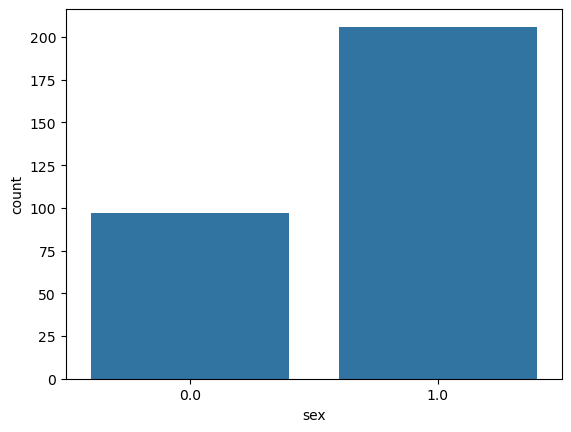

cp
[1. 4. 3. 2.]
----------------------------------------------------------------------------------------------------------------------------------------------------------------


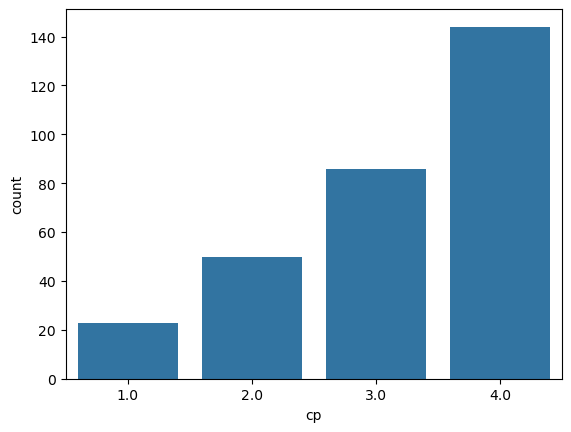

restbp
[145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.]
----------------------------------------------------------------------------------------------------------------------------------------------------------------
chol
[233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321. 274.
 325. 235. 257. 164. 141. 252. 255. 201. 222. 260. 182. 303. 265. 309.
 307. 249. 186. 341. 183. 407. 217. 288. 220. 209. 227. 261. 174. 281.
 221. 205. 240. 289. 318. 298. 564. 246. 322. 299. 300. 293. 277. 214.
 207

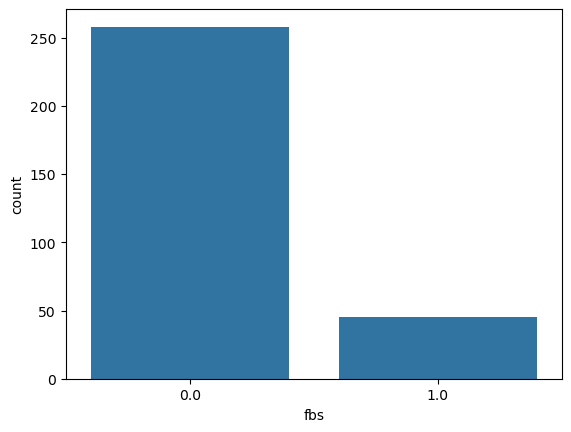

restecg
[2. 0. 1.]
----------------------------------------------------------------------------------------------------------------------------------------------------------------


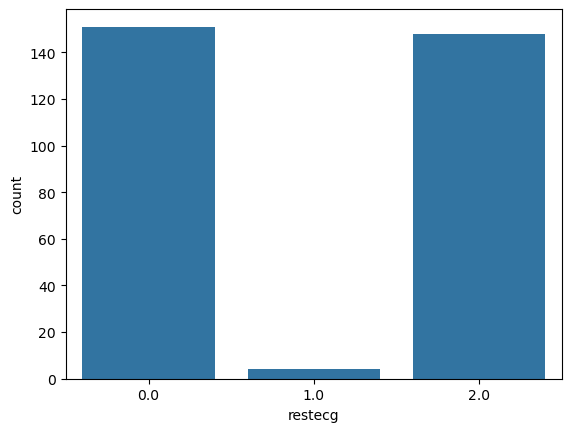

thalach
[150. 108. 129. 187. 172. 178. 160. 163. 147. 155. 148. 153. 142. 173.
 162. 174. 168. 139. 171. 144. 132. 158. 114. 151. 161. 179. 120. 112.
 137. 157. 169. 165. 123. 128. 152. 140. 188. 109. 125. 131. 170. 113.
  99. 177. 141. 180. 111. 143. 182. 156. 115. 149. 145. 146. 175. 186.
 185. 159. 130. 190. 136.  97. 127. 154. 133. 126. 202. 103. 166. 164.
 184. 124. 122.  96. 138.  88. 105. 194. 195. 106. 167.  95. 192. 117.
 121. 116.  71. 118. 181. 134.  90.]
----------------------------------------------------------------------------------------------------------------------------------------------------------------
exang
[0. 1.]
----------------------------------------------------------------------------------------------------------------------------------------------------------------


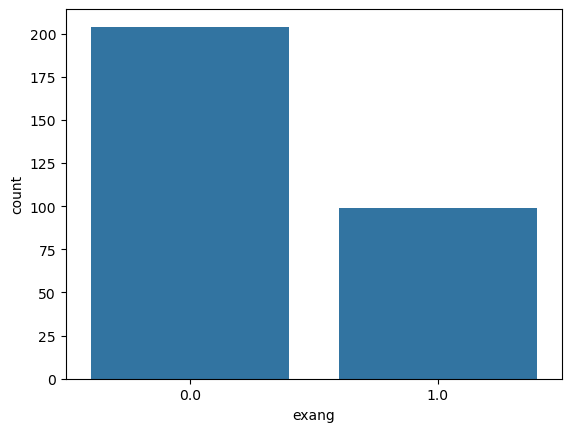

oldpeak
[2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 3.1 0.4 1.3 0.  0.5 1.6 1.  1.2 0.2 1.8
 3.2 2.4 2.  2.5 2.2 2.8 3.  3.4 6.2 4.  5.6 2.9 0.1 2.1 1.9 4.2 0.9 1.1
 3.8 0.7 0.3 4.4]
----------------------------------------------------------------------------------------------------------------------------------------------------------------
slope
[3. 2. 1.]
----------------------------------------------------------------------------------------------------------------------------------------------------------------


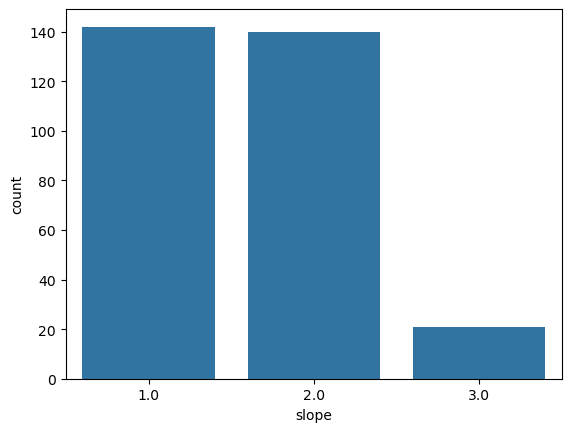

ca
['0.0' '3.0' '2.0' '1.0' '?']
----------------------------------------------------------------------------------------------------------------------------------------------------------------
thal
['6.0' '3.0' '7.0' '?']
----------------------------------------------------------------------------------------------------------------------------------------------------------------


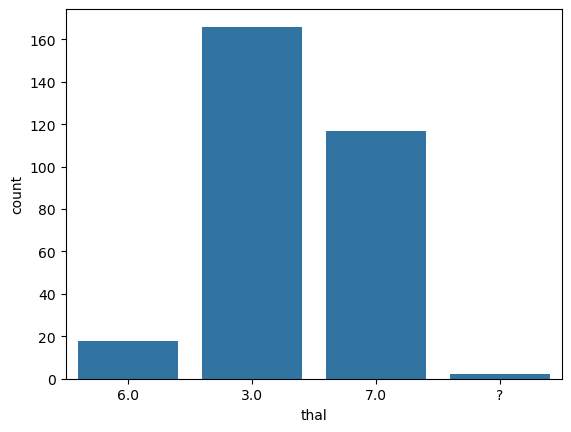

hd
[0 2 1 3 4]
----------------------------------------------------------------------------------------------------------------------------------------------------------------


In [29]:
#Categorical data exploration- 
cols = df.columns.tolist()
for i in cols:
    print(i)
    print(df[i].unique())
    print('----' * 40)
    if len(df[i].unique()) < 5:  # Correctly check the length of unique values
        sns.countplot(data=df, x=i)
        plt.show()  # Ensure the plot is displayed


In [30]:
cols

['age',
 'sex',
 'cp',
 'restbp',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'hd']

In [31]:
#replacing the misisng value
df['ca'] = df['ca'].replace('?',df['ca'].mode()[0]).astype(float)
df['thal'] = df['thal'].replace('?',df['thal'].mode()[0]).astype(float)

In [32]:
catcols=['sex','cp','fbs','restecg','exang','slope','ca','thal','hd']

In [33]:
numcols=[i for i in cols if i not in catcols]

In [34]:
numcols

['age', 'restbp', 'chol', 'thalach', 'oldpeak']

<Axes: xlabel='hd', ylabel='Density'>

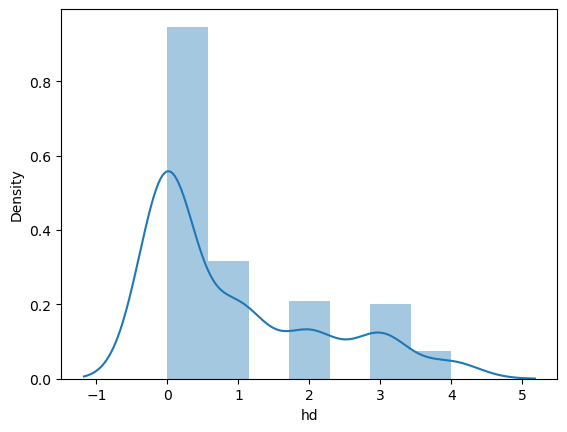

In [35]:
sns.distplot(df.hd)

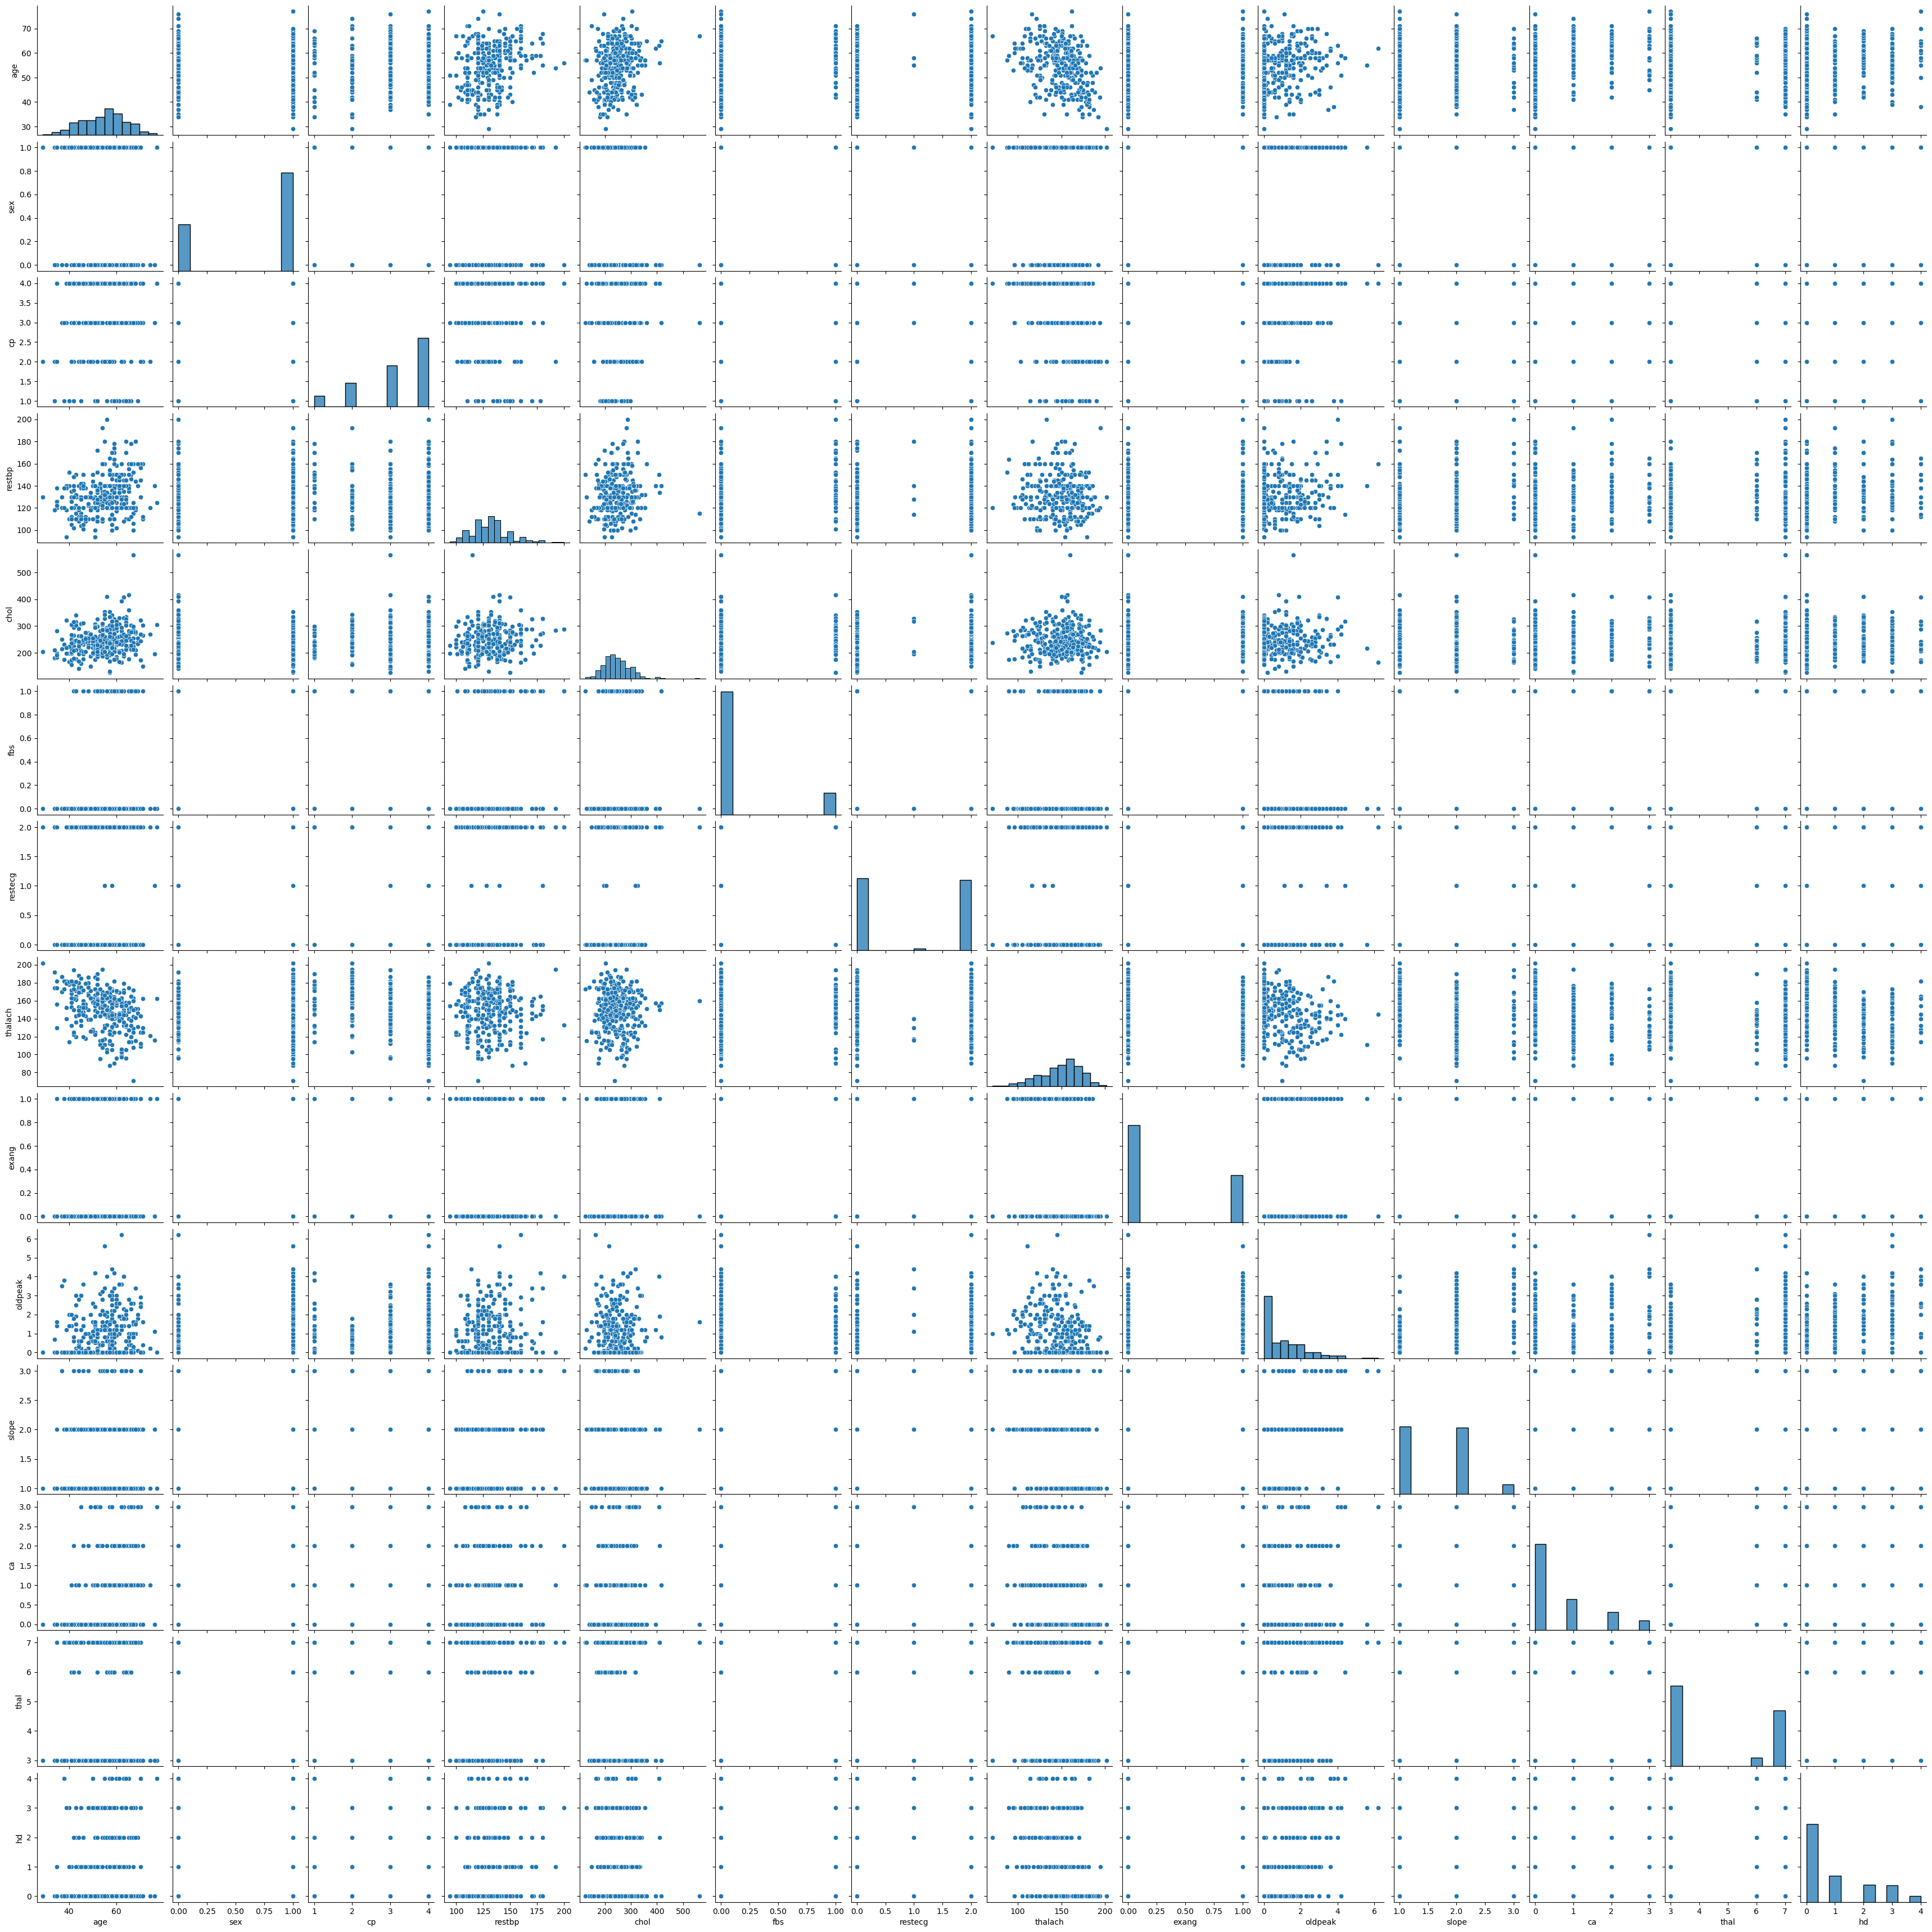

In [36]:
sns.pairplot(df)

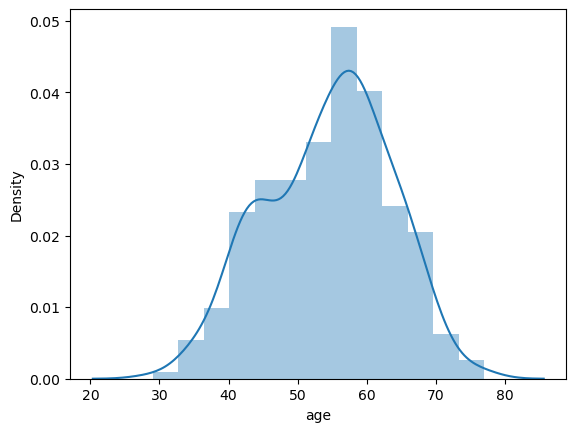

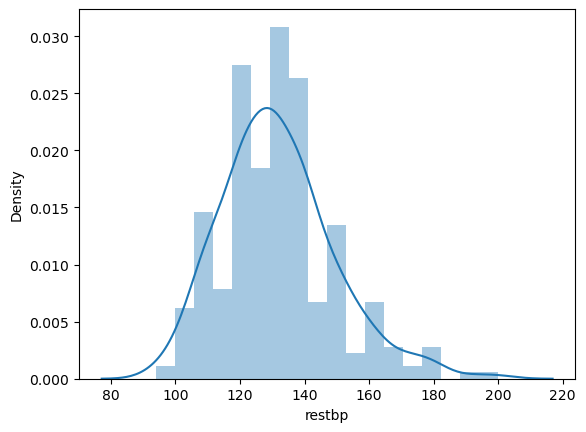

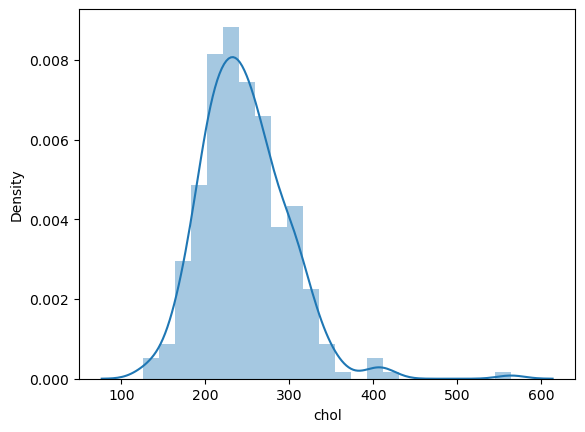

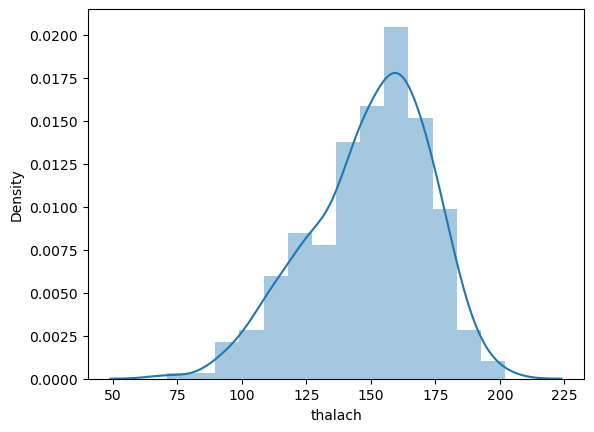

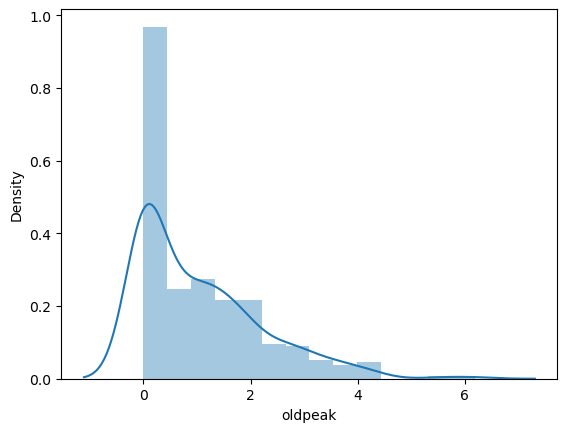

In [37]:
for i in numcols:
    sns.distplot(df[i])
    plt.show()

In [38]:
#Decision tree is completely based branching of the tree, and therefore the skewness doesnt have to be corrected, but otherwise for linear regression and logistic regression have to be corrected.

In [39]:
new_hd=[]
for i in df.hd:
    if i ==0:
        new_hd.append(0)
    else:
        new_hd.append(1)

In [40]:
df['hd']=new_hd

<Axes: xlabel='hd', ylabel='count'>

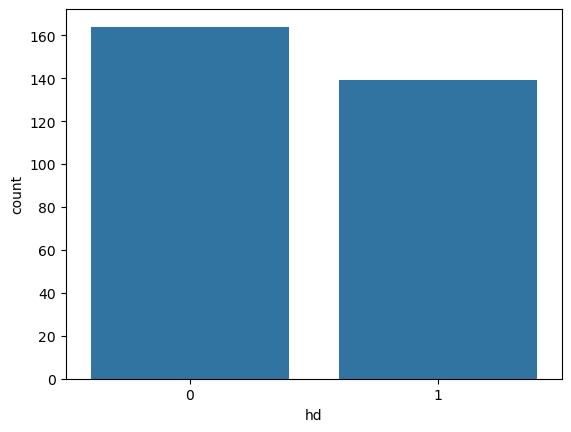

In [41]:
sns.countplot(data=df,x=df.hd)

<Axes: xlabel='age', ylabel='chol'>

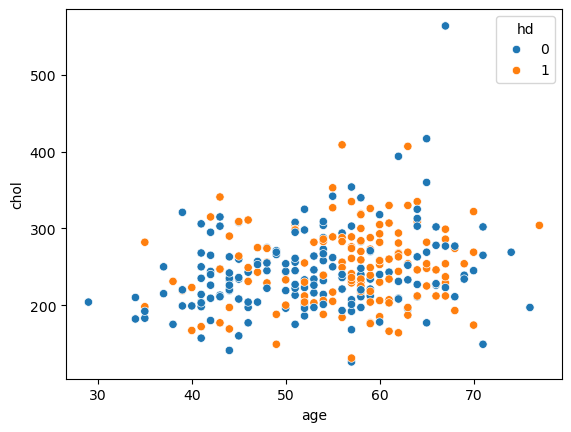

In [42]:
sns.scatterplot(data=df,x='age',y='chol',hue='hd')
#The interpretation here is that there is dense data for over the age of 50 and cholestrol level between 200-300 

<Axes: xlabel='age', ylabel='restbp'>

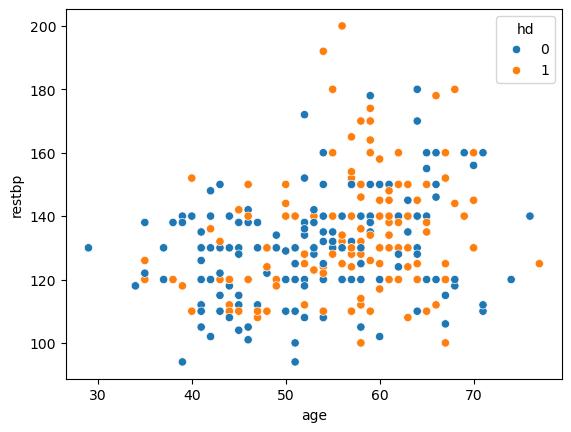

In [43]:
sns.scatterplot(data=df,x='age',y='restbp',hue='hd')

In [45]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df.drop(columns=['hd'])  # Features
y = df['hd']  # Target variable

# Encode categorical features if necessary
X = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)
y_pred_train = dt_model.predict(X_train)
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_train, y_pred_train))

Accuracy: 0.7540983606557377
Accuracy: 1.0


In [46]:
#Using the concept of cost complexity cloning: The model is asking to decide an alpha value or a penalty term to the data, based on alpha value the pruning is done.
a=dt_model.cost_complexity_pruning_path(X_train,y_train)

In [47]:
a

{'ccp_alphas': array([0.        , 0.00270732, 0.00391475, 0.00404431, 0.00459137,
        0.00495868, 0.0053719 , 0.00550964, 0.00619835, 0.00704654,
        0.00734619, 0.00743802, 0.00744754, 0.00751315, 0.00784665,
        0.00797062, 0.00818098, 0.00881543, 0.00883991, 0.00981718,
        0.01155869, 0.01240722, 0.01446281, 0.01622048, 0.02409502,
        0.03347107, 0.0462963 , 0.11822024]),
 'impurities': array([0.        , 0.00812197, 0.01595146, 0.02404009, 0.03781419,
        0.04773155, 0.05847535, 0.06398499, 0.07018334, 0.07722988,
        0.08457607, 0.0994521 , 0.12924227, 0.13675541, 0.14460206,
        0.16851391, 0.17669489, 0.18551032, 0.19435024, 0.20416742,
        0.2157261 , 0.24054055, 0.25500336, 0.27122384, 0.29531886,
        0.32878993, 0.37508623, 0.49330647])}

In [48]:
a['ccp_alphas'][0:-1]

array([0.        , 0.00270732, 0.00391475, 0.00404431, 0.00459137,
       0.00495868, 0.0053719 , 0.00550964, 0.00619835, 0.00704654,
       0.00734619, 0.00743802, 0.00744754, 0.00751315, 0.00784665,
       0.00797062, 0.00818098, 0.00881543, 0.00883991, 0.00981718,
       0.01155869, 0.01240722, 0.01446281, 0.01622048, 0.02409502,
       0.03347107, 0.0462963 ])